# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Import Tidied Data

In [2]:
df = pd.read_csv('/data/jandrewtorres/tidied_data.csv')

## Explore Correlations

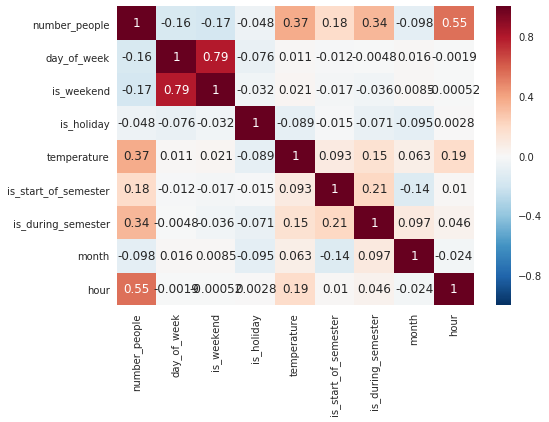

In [3]:
corr = df.corr()
sb.heatmap(corr, annot = True)
plt.show()

## Analysis
There is a high positive correlation between number of people and:
- hour
- temperature
- is during semester
- is start of semester

There is a high negative correlation between number of people and:
- is weekend
- day of week

Let's create visualizations of the correlations

# Visualizing Important Correlations/Relationships in data

## Prepare dataframes for visualization

In [4]:
# Hour
by_hour = df.groupby(df.hour).mean()

# Temperature
labels = [str(i) for i in np.arange(30, 97.5, 7.5)]
xnums = [i for i in np.arange(0, 22.5, 2.5)]
by_temp = df.groupby(pd.cut(df["temperature"], np.arange(37.5, 90, 2.5))).mean()
by_temp = by_temp.drop('temperature', axis = 1)
by_temp = by_temp.reset_index()

# is_start
by_start = df.groupby(df.is_start_of_semester).mean()

# is_during
by_during = df.groupby(df.is_during_semester).mean()

# is_weekend
is_weekend = df.groupby(df.is_weekend).mean()
day_of = df.groupby(df.day_of_week).mean()

## Plot dataframes

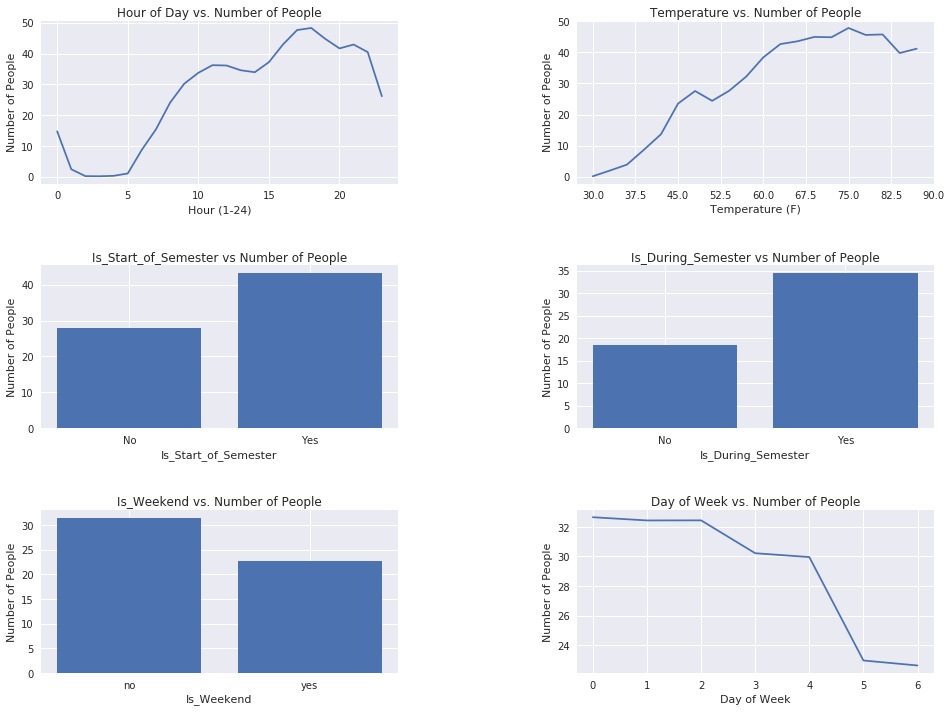

In [8]:
parentplot = plt.figure(figsize=(16,12))
parentplot.subplots_adjust(hspace=0.5, wspace=0.5)

# Hour
plt.subplot(3,2,1)
plt.plot(by_hour.index, by_hour.number_people)
plt.title('Hour of Day vs. Number of People')
plt.xlabel('Hour (1-24)')
plt.ylabel('Number of People')

# Temperature
plt.subplot(3,2,2)
plt.plot(by_temp.index, by_temp.number_people)
plt.title('Temperature vs. Number of People')
plt.ylabel('Number of People')
plt.xlabel('Temperature (F)')
plt.xticks(xnums, labels)

# is_start
plt.subplot(3,2,3)
plt.bar(by_start.index, by_start.number_people)
plt.title('Is_Start_of_Semester vs Number of People')
plt.xlabel('Is_Start_of_Semester')
plt.ylabel('Number of People')
plt.xticks([0,1], ['No', 'Yes'])

# is_during
plt.subplot(3,2,4)
plt.bar(by_during.index, by_during.number_people)
plt.title('Is_During_Semester vs Number of People')
plt.xlabel('Is_During_Semester')
plt.ylabel('Number of People')
plt.xticks([0,1], ['No', 'Yes'])

# is_weekend
plt.subplot(3,2,5)
plt.bar(is_weekend.index, is_weekend.number_people)
plt.title('Is_Weekend vs. Number of People')
plt.xlabel('Is_Weekend')
plt.xticks([0,1],['no','yes'])
plt.ylabel('Number of People')

# day_of_week
plt.subplot(3,2,6)
plt.plot(day_of.index, day_of.number_people)
plt.title('Day of Week vs. Number of People')
plt.ylabel('Number of People')
plt.xlabel('Day of Week')

plt.show()

## Conclusions

- More people go to the gym later in the day
- There are more people in the gym when it is mild temperature outside, BUT the time of day and temperature have a relationship that is likely affecting this relationship
- More people are in the gym at the start of the semester than the middle of the semester
- More people are in the gym during the semester than not during the semester
- More people are in the gym during the week than weekend
- The average number of people in the gym steadily declines from Monday to Sunday
